In [23]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [24]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [25]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [26]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:5]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


<Axes: xlabel='Date Time'>

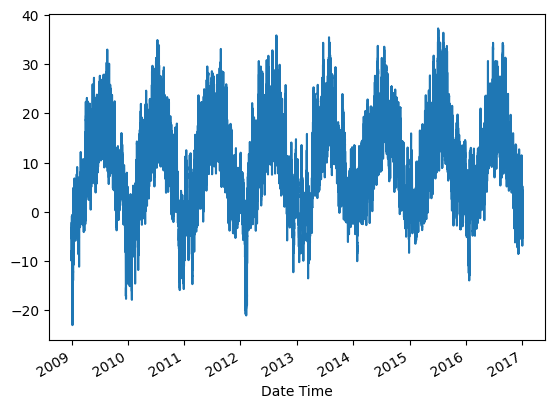

In [27]:
temp = df['T (degC)']
temp.plot()

In [28]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [29]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((420546, 5, 1), (420546,))

In [30]:
X_train1, y_train1 = X1[:300000], y1[:300000]
X_val1, y_val1 = X1[300000:350000], y1[300000:350000]
X_test1, y_test1 = X1[350000:], y1[350000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((300000, 5, 1), (300000,), (50000, 5, 1), (50000,), (70546, 5, 1), (70546,))

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [32]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [33]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
9369/9375 [============================>.] - ETA: 0s - loss: 38.0086 - root_mean_squared_error: 6.1651

9375/9375 [==============================] - 83s 8ms/step - loss: 37.9844 - root_mean_squared_error: 6.1632 - val_loss: 0.6260 - val_root_mean_squared_error: 0.7912
Epoch 2/10
9368/9375 [============================>.] - ETA: 0s - loss: 0.0811 - root_mean_squared_error: 0.2848

9375/9375 [==============================] - 65s 7ms/step - loss: 0.0811 - root_mean_squared_error: 0.2847 - val_loss: 0.0592 - val_root_mean_squared_error: 0.2433
Epoch 3/10
9371/9375 [============================>.] - ETA: 0s - loss: 0.0474 - root_mean_squared_error: 0.2178

9375/9375 [==============================] - 72s 8ms/step - loss: 0.0474 - root_mean_squared_error: 0.2178 - val_loss: 0.0498 - val_root_mean_squared_error: 0.2232
Epoch 4/10
9373/9375 [============================>.] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.2141

9375/9375 [==============================] - 68s 7ms/step - loss: 0.0459 - root_mean_squared_error: 0.2142 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2229
Epoch 5/10
9368/9375 [============================>.] - ETA: 0s - loss: 0.0452 - root_mean_squared_error: 0.2126

9375/9375 [==============================] - 64s 7ms/step - loss: 0.0452 - root_mean_squared_error: 0.2126 - val_loss: 0.0481 - val_root_mean_squared_error: 0.2193
Epoch 6/10
9374/9375 [============================>.] - ETA: 0s - loss: 0.0447 - root_mean_squared_error: 0.2114

9375/9375 [==============================] - 66s 7ms/step - loss: 0.0447 - root_mean_squared_error: 0.2114 - val_loss: 0.0472 - val_root_mean_squared_error: 0.2173
Epoch 7/10
9372/9375 [============================>.] - ETA: 0s - loss: 0.0445 - root_mean_squared_error: 0.2109

9375/9375 [==============================] - 63s 7ms/step - loss: 0.0445 - root_mean_squared_error: 0.2109 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 8/10
9370/9375 [============================>.] - ETA: 0s - loss: 0.0442 - root_mean_squared_error: 0.2102

9375/9375 [==============================] - 66s 7ms/step - loss: 0.0442 - root_mean_squared_error: 0.2101 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2138
Epoch 9/10
9375/9375 [==============================] - 60s 6ms/step - loss: 0.0441 - root_mean_squared_error: 0.2100 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2142
Epoch 10/10
9367/9375 [============================>.] - ETA: 0s - loss: 0.0440 - root_mean_squared_error: 0.2098

9375/9375 [==============================] - 64s 7ms/step - loss: 0.0440 - root_mean_squared_error: 0.2098 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2138


In [34]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [35]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

9375/9375 [==============================] - 27s 3ms/step


,Train Predictions,Actuals
0,-8.334848,-8.05
1,-7.917601,-7.62
2,-7.398519,-7.62
3,-7.646262,-7.91
4,-7.977320,-8.43
...,...,...
299995,14.817673,14.78
299996,14.791802,14.73
299997,14.730970,14.73
299998,14.757670,14.73


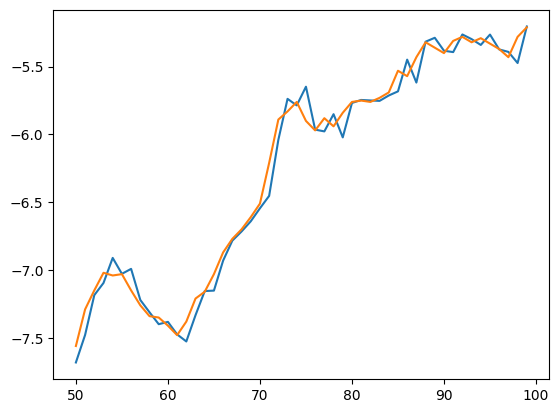

In [36]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [37]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1563/1563 [==============================] - 5s 3ms/step


,Val Predictions,Actuals
0,14.750928,14.73
1,14.755820,14.73
2,14.755820,14.73
3,14.755820,14.69
4,14.694884,14.67
...,...,...
49995,17.625353,17.84
49996,17.858423,17.89
49997,17.855211,17.60
49998,17.438972,16.70


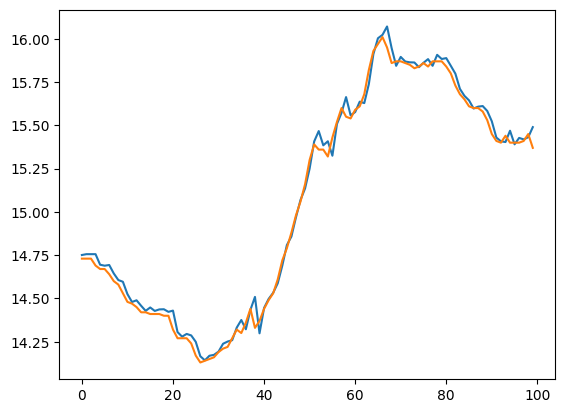

In [38]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [39]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

2205/2205 [==============================] - 6s 3ms/step


,Test Predictions,Actuals
0,15.567188,15.89
1,15.843986,16.26
2,16.296469,16.24
3,16.133572,15.88
4,15.757777,15.37
...,...,...
70541,-4.023218,-4.05
70542,-4.004429,-3.35
70543,-2.968073,-3.16
70544,-3.184001,-4.23


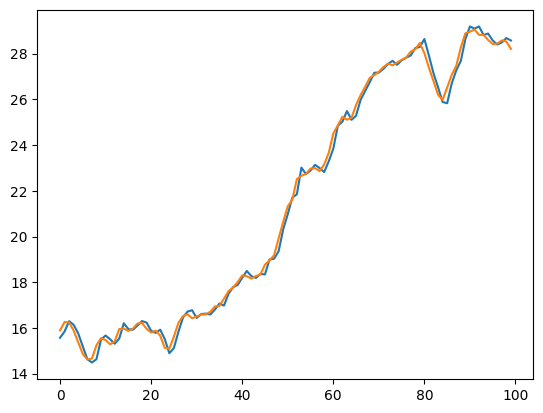

In [40]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])